In [1]:
import pandas as pd

In [2]:
#load the dataset into a panda dataframe
df = pd.read_csv("Resources/carvana_carvana_car_sold-2022-08.csv", index_col = False)
df = df.head(2000)

In [3]:
df_new = df.dropna()
df_new

,vehicle_id,stock_number,year,make,model,miles,trim,sold_price,discounted_sold_price,partnered_dealership,delivery_fee,earliest_delivery_date,sold_date
0,2270123,2001646447,2014,Volkswagen,Jetta,53238,2.0L S,15990,15990,False,1490,2022-09-09T21:34:31.376Z,2022-08-31
1,2298228,2001690283,2015,Chevrolet,Volt,112160,base,17590,17590,False,790,2022-09-09T22:04:42.555Z,2022-08-31
2,2463098,2001933427,2015,Ford,Focus,57046,SE,14990,14990,False,0,2022-09-06T21:35:20.3145311Z,2022-08-31
3,2488480,2001977729,2013,Honda,Odyssey,103874,EX-L,18990,18990,False,490,2022-09-06T22:04:19.711928Z,2022-08-31
4,2183400,2001531442,2015,Chevrolet,Cruze,86301,1LT,13990,13990,False,790,2022-09-09T22:05:19.367Z,2022-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2267759,2001644736,2009,Chevrolet,Silverado 1500 Crew Cab,89485,LT 5 3/4 ft,21590,21590,False,490,2022-09-07T22:05:34.164Z,2022-08-30
1996,2485171,2001960987,2020,Ram,1500 Quad Cab,29226,Big Horn 6 1/3 ft,37990,37990,False,790,2022-09-05T21:05:00.9919701Z,2022-08-30
1997,2487925,2001981600,2019,Buick,Encore,30461,Preferred,22590,22590,False,1490,2022-09-08T20:59:23.861Z,2022-08-30
1998,2198671,2001540356,2017,Land Rover,Range Rover Evoque,55881,SE Premium,30590,30590,False,0,2022-09-04T21:34:58.971Z,2022-08-30


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
#from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df_car = df_new.drop(columns = ["vehicle_id", "stock_number","discounted_sold_price","partnered_dealership","earliest_delivery_date","sold_date"])
df_car

,year,make,model,miles,trim,sold_price,delivery_fee
0,2014,Volkswagen,Jetta,53238,2.0L S,15990,1490
1,2015,Chevrolet,Volt,112160,base,17590,790
2,2015,Ford,Focus,57046,SE,14990,0
3,2013,Honda,Odyssey,103874,EX-L,18990,490
4,2015,Chevrolet,Cruze,86301,1LT,13990,790
...,...,...,...,...,...,...,...
1995,2009,Chevrolet,Silverado 1500 Crew Cab,89485,LT 5 3/4 ft,21590,490
1996,2020,Ram,1500 Quad Cab,29226,Big Horn 6 1/3 ft,37990,790
1997,2019,Buick,Encore,30461,Preferred,22590,1490
1998,2017,Land Rover,Range Rover Evoque,55881,SE Premium,30590,0


In [6]:
df_car.dtypes

year             int64
make            object
model           object
miles            int64
trim            object
sold_price       int64
delivery_fee     int64
dtype: object

In [7]:
df_car.duplicated().sum()

0

In [8]:
Final_car_price = df_car.drop_duplicates()
Final_car_price_pred = pd.DataFrame(Final_car_price)
Final_car_price_pred 

,year,make,model,miles,trim,sold_price,delivery_fee
0,2014,Volkswagen,Jetta,53238,2.0L S,15990,1490
1,2015,Chevrolet,Volt,112160,base,17590,790
2,2015,Ford,Focus,57046,SE,14990,0
3,2013,Honda,Odyssey,103874,EX-L,18990,490
4,2015,Chevrolet,Cruze,86301,1LT,13990,790
...,...,...,...,...,...,...,...
1995,2009,Chevrolet,Silverado 1500 Crew Cab,89485,LT 5 3/4 ft,21590,490
1996,2020,Ram,1500 Quad Cab,29226,Big Horn 6 1/3 ft,37990,790
1997,2019,Buick,Encore,30461,Preferred,22590,1490
1998,2017,Land Rover,Range Rover Evoque,55881,SE Premium,30590,0


# Fit, Model, Predict

In [9]:
# Create data
X = Final_car_price_pred[["year","make","model","miles","trim","delivery_fee"]]

X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['year', 'miles', 'delivery_fee', 'make_Acura', 'make_Alfa Romeo',
       'make_Audi', 'make_BMW', 'make_Buick', 'make_Cadillac',
       'make_Chevrolet',
       ...
       'trim_i Touring', 'trim_s Grand Touring', 'trim_sDrive28i',
       'trim_sDrive30i', 'trim_xDrive28i', 'trim_xDrive35i',
       'trim_xDrive35i Premium', 'trim_xDrive35i Sport Activity',
       'trim_xDrive40i', 'trim_xDrive50i'],
      dtype='object', length=910)


,year,miles,delivery_fee,make_Acura,make_Alfa Romeo,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,...,trim_i Touring,trim_s Grand Touring,trim_sDrive28i,trim_sDrive30i,trim_xDrive28i,trim_xDrive35i,trim_xDrive35i Premium,trim_xDrive35i Sport Activity,trim_xDrive40i,trim_xDrive50i
0,2014,53238,1490,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,112160,790,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2015,57046,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013,103874,490,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,86301,790,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2009,89485,490,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1996,2020,29226,790,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,2019,30461,1490,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,2017,55881,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = Final_car_price_pred["sold_price"]
y

0       15990
1       17590
2       14990
3       18990
4       13990
        ...  
1995    21590
1996    37990
1997    22590
1998    30590
1999    15590
Name: sold_price, Length: 2000, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

# Random Forest Classifier

In [12]:
clf = RandomForestClassifier(random_state=1, n_estimators=20).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9986666666666667
Testing Score: 0.068


Remove the "sold_price" column from the dataset to use Unsupervised Machine Learning Algorithms. 



## SVC Model

In [13]:
# Create the SVC model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [14]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
param_grid

{'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [15]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(model, param_grid, verbose=1)

In [16]:
# Fit the model by using the grid search classifier. 
# This will take the SVC model and try each combination of parameters.
grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/hoobie4792/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=1)

In [17]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'C': 5, 'gamma': 0.0001}


In [18]:
# List the best score
print(grid_clf.best_score_)

0.07733333333333334


# Logistic Regression Model

In [19]:
# Train a Logistic Regression model print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [20]:
classifier.fit(X_train_scaled, y_train)

/Users/hoobie4792/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.802
Testing Data Score: 0.076


# Linear Regression

In [22]:
# Create the model by using LinearRegression.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9361293257509127
Testing Score: -1.9749831910427433e+27


Negative Training Score indicates that model is performing worse than just random guessing.

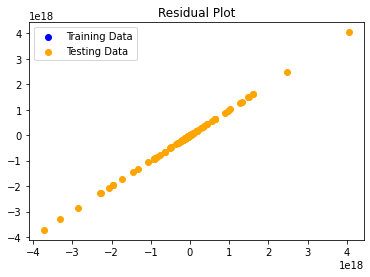

In [24]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

# LASSO Model

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
reg = LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

-1.9749831910427433e+27

In [26]:
reg = Lasso().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

/Users/hoobie4792/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+07, tolerance: 1.741e+07
  model = cd_fast.enet_coordinate_descent(


0.7275780628250872

In [27]:
from sklearn.feature_selection import SelectFromModel

In [28]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel.fit(X_train_scaled, y_train)

/Users/hoobie4792/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+07, tolerance: 1.741e+07
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso())

In [30]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_dummies), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/hoobie4792/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [31]:
reg = LinearRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

-5.595015631523607e+26

# Familar Regressors

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [39]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()

In [40]:
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.9361293257509127
Test Score: -1.9749831910427433e+27

Model: KNeighborsRegressor
Train score: 0.3847293694034717
Test Score: 0.056028708521581705

Model: RandomForestRegressor
Train score: 0.9446349412560111
Test Score: 0.582523128428597

Model: ExtraTreesRegressor
Train score: 0.9999999816149854
Test Score: 0.6601565242414031

Model: AdaBoostRegressor
Train score: -0.3016673380845689
Test Score: -0.4639895215662446

Model: SVR
Train score: -0.0750182338988099
Test Score: -0.05217321123976837



# Ridge Model

{'alpha': 100}
-1.100704994003196
